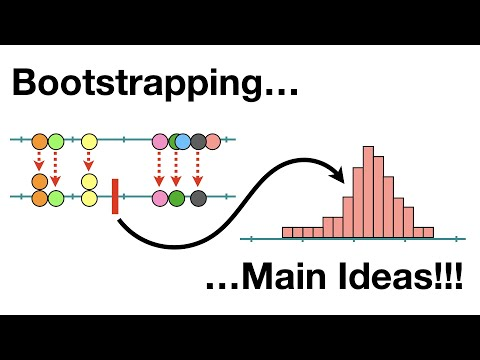

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1.

Standard Deviation (SD) measures the amount of variation or dispersion from the average in a set of data. It tells us how much the individual data point differ from the mean value of the data set. Standard Error of the Mean (SEM) measures how much the sample mean of the data is expected to vary from the true population mean. It is used to estimate how accurately the sample mean represents the population means.

So, SD measures the spread of data points around their mean in the original dataset, while SEM is about the precision of the mean as an estimate of the population mean. Each one is used for different purposes. The impact of sample size is also different. SD does not change with the size of the sample because it depends on the data. On the other hand, SEM decreases as the sample size increases, reflecting increased precision in estimating the population mean with larger samples.

2.

First, compute the sample mean of the sample data, which is x̄. Then, compute the Standard Error of the Mean (SEM) using the formula SEM = s /√n, where s is the standard deviation of the sample data and n is the number of observations in the sample. We also need to use z which is the critical value from the normal distribution that corresponds to the confidence level (for 95%, z ≈ 1.96). It means that 95% of the values lie within ± 1.96 standard deviations from the mean.

Now, we can use the formula for the 95% confidence interval, which is CI = x̄ ± z x SEM

3.

Creating a 95% confidence interval using sample means without directly computing the standard error involves using the percentile method. First, from the original dataset, we need to repeatedly draw samples with replacement. Each sample should be the same size as the original dataset. Then, calculate the mean of each bootstrap sample, which will end up with a distribution of bootstrapped means. Second, we can use the np.quantile() function to find the percentiles that form the bounds of our confidence interval. For a 95% confidence interval, we would extract the 2.5th and 97.5th percentiles of our bootstrapped means. The function np.quantile() computes the quantiles of a dataset, which are essentially cut points dividing the range of our data. The bootstrap method relies on the empirical distribution of bootstrapped statistics to approximate the sampling distribution. Using percentiles directly from the empirical distribution of the data avoids assumptions about the shape of the distribution. This method is straightforward and doesn't require complex calculations.

4.

In [1]:
import numpy as np
import random

data = np.random.normal(loc=50, scale=10, size=100)  # Generates 100 random numbers from a normal distribution with mean=50 and std=10

In [2]:
def bootstrap_confidence_interval(data, num_resamples, statistic_func, confidence_level):
    # List to store the bootstrap sample statistics
    bootstrap_statistics = []
    
    # Perform the bootstrap procedure
    for _ in range(num_resamples):
        # Resample the data with replacement
        resample = random.choices(data, k=len(data))
        
        # Calculate the statistic for the resample
        stat = statistic_func(resample)
        bootstrap_statistics.append(stat)
    
    # Calculate the confidence interval from the bootstrap statistics
    alpha = 1 - confidence_level
    lower_bound = np.percentile(bootstrap_statistics, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_statistics, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

In [3]:
# Number of bootstrap resamples to perform
num_resamples = 1000

# Calculate 95% confidence interval for the mean
mean_confidence_interval = bootstrap_confidence_interval(data, num_resamples, np.mean, 0.95)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_confidence_interval}")

95% Bootstrap Confidence Interval for the Mean: (45.78123940081513, 49.7017201420606)


In [6]:
# Calculate 95% confidence interval for the median
median_confidence_interval = bootstrap_confidence_interval(data, num_resamples, np.median, 0.95)

# to produce a 95% bootstrap confidence interval for population median,
# you simply just change the statistic_func from np.mean to np.median
# from mean_confidence_interval to median_conference_interval

print(f"95% Bootstrap Confidence Interval for the Median: {median_confidence_interval}")

95% Bootstrap Confidence Interval for the Median: (45.08280917773612, 49.702143885975346)


5.

Population parameter refers to a true, fixed value that describes some characteristic of the entire population. It is typically unknown because it's impractical to measure the entire population. Sample statistic is a value calculated from a sample, which is used as an estimate of the population parameter. Since the sample is just a subset of the population, the sample statistic varies form sample to sample. The confidence interval provides a range of values based on the sample statistic, but it is intended to cover the true population parameter with a certain level of confidence. The interval does not predict where future sample statistics will lie; it's about the population parameter.

6.

a) Imagine you have some data, let's say you measured the heights of 20 people and now you want to estimate the average height for the whole population (not just those 20 people). To use bootstrapping, you take multiple random samples from your original data. However, instead of just taking one sample, you resample with replacement. This means that after you pick a data point, you put it back so that it could be picked again in the same sample. For example, if you have 20 heights, you might pick a new sample of 20 heights, where some heights might appear more than once and some might not appear at all because you're picking with replacement. After creating a new sample, calculate the statistic you prefer. In this example, let's calculate the mean height. Repeat this process many times like 1000 times. So now you have 1000 different means, each from a different bootstrap sample. Once you've collected all of these means, you can look at their distribution. This gives you an idea of how the sample means vary and helps you estimate the range of likely values for the true population mean. To figure out how confident you are that the true population mean falls within a certain range, you can create a confidence interval from these bootstrap results. For a 95% confidence interval, you would take the 2.5th percentile and the 97.5th percentile of your bootstrap means, which gives you a range that likely contains the true mean.

b) Imagine you want to understand something about a large group of people or things, like the average height of all adults in Canada. You can only measure a small number of them because measuring every single person is too hard or impossible. After measuring a few adults, you can calculate the average height from your sample. Bootstrapping is used to measure the accuracy and reliability of estimates (like averages) from your sample data by simulating many possible versions of your dataset. It's like using your existing data to create many "what-if" scenarios. It helps you understand how much your results might change if you had different data, without actually needing new data. By looking at the spread of these values, you can see how much your estimate might change with different data. So you could have a clearer picture of what your data is telling you.

c) Let's say you have a guess about the average height of all the trees in a forest, and it is 90 feet. But you've only measured a small sample of trees, n = 30 trees. And you want to check if your guess 90 feet seems reasonable based on the data you have. After you measured the height of 30 trees, let's say the average height from this sample is 80 feet. Using bootstrapping, you take many random samples from your original data of 30 tree heights. Importantly, you allow repeated values to be picked in each resample, which is called sampling with replacement. Do this thousands of times, and for each resample, calculate the average height. Now, you have a bunch of bootstrapped sample means. The averages from all these bootstrapped resamples will form a distribution (a spread of possible average heights based on your original sample). Now you can look at where your hypothesized guess of 90 feet falls in this distribution of bootstrapped means. If 90 feet is within the typical bootstrapped means, it suggests that your guess might be reasonable. If 90 feets is far outside the typical bootstrapped means, this suggests that your guess might not be plausible because the data doesn't support it.

7.

The null hypothesis is that the drug doesn't work, meaning it has no effect on average. In this case, that means the effect is zero. A confidence interval is a range of values where we think the true effect of the drug could be. If this interval includes zero, it means the true effect might be zero (no effect), so we can't be sure the drug actually works. Even if the study shows a positive or negative effect (the sample mean isn't zero), if zero is still in the confidence interval, we can't confidently say the drug has an effect. Based on this data, it's possible the drug doesn't work. If the confidence interval does not include zero, it means we have stronger evidence that the true effect isn't zero (the drug does something). So we would reject the null hypothesis and say the drug would actually work.

8.

# Problem Introduction

The Null Hypothesis of "no effect" in this context would be something like "The vaccine has no effect on the patients' health, meaning that the final health scores do not significantly improve compared to the initial health scores.

In [8]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('vaccine_data.csv', index=False)

# Read the CSV file back into the code for analysis
df_read = pd.read_csv('vaccine_data.csv')

# Now proceed with your analysis
print(df_read)

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
5          6   41      F                  80                86
6          7   33      M                  79                86
7          8   48      F                  85                82
8          9   26      M                  76                83
9         10   39      F                  83                84


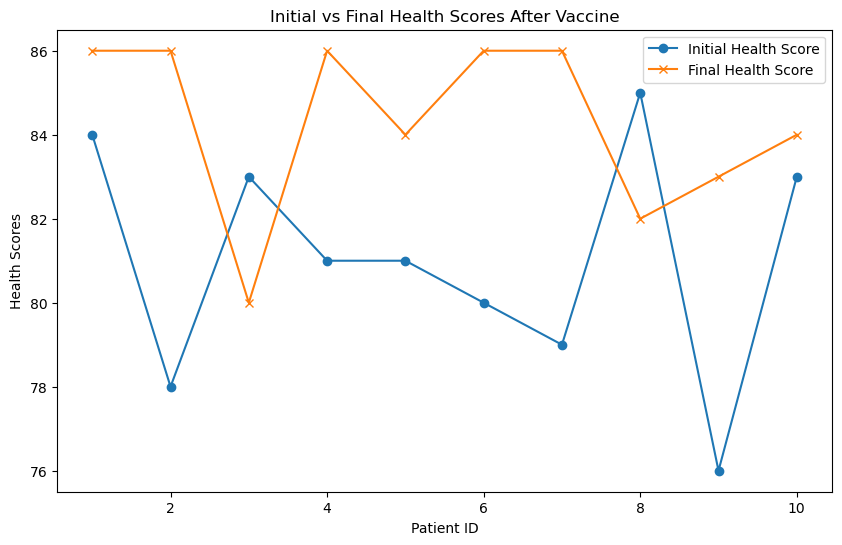

In [9]:
import matplotlib.pyplot as plt

# Plot initial vs final health scores
plt.figure(figsize=(10,6))
plt.plot(data['PatientID'], data['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(data['PatientID'], data['FinalHealthScore'], label='Final Health Score', marker='x')
plt.xlabel('Patient ID')
plt.ylabel('Health Scores')
plt.title('Initial vs Final Health Scores After Vaccine')
plt.legend()
plt.show()

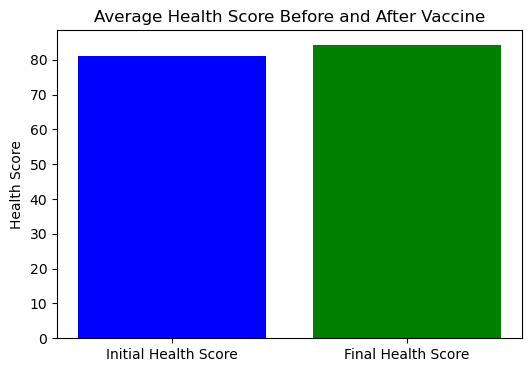

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('vaccine_data.csv')

# Step 1: Calculate the mean of Initial and Final Health Scores
mean_initial = df['InitialHealthScore'].mean()
mean_final = df['FinalHealthScore'].mean()

# Step 2: Create a bar plot comparing the mean Initial and Final Health Scores
plt.figure(figsize=(6, 4))
plt.bar(['Initial Health Score', 'Final Health Score'], [mean_initial, mean_final], color=['blue', 'green'])

# Add title and labels
plt.title('Average Health Score Before and After Vaccine')
plt.ylabel('Health Score')
plt.show()

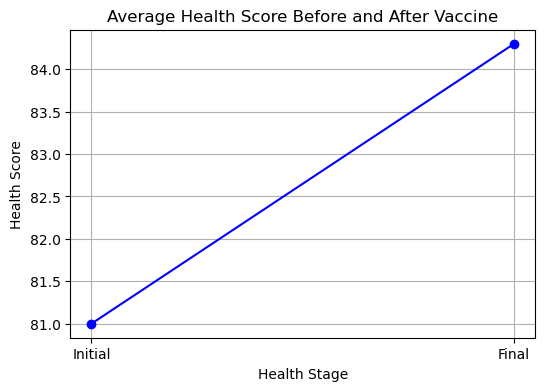

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('vaccine_data.csv')

# Step 1: Calculate the average Initial and Final Health Scores
mean_initial = df['InitialHealthScore'].mean()
mean_final = df['FinalHealthScore'].mean()

# Step 2: Create a simple line plot comparing the mean Initial and Final Health Scores
plt.figure(figsize=(6, 4))
plt.plot(['Initial', 'Final'], [mean_initial, mean_final], marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Average Health Score Before and After Vaccine')
plt.ylabel('Health Score')
plt.xlabel('Health Stage')

# Display the plot
plt.grid(True)
plt.show()

# Quantitative Analysis

In [14]:
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Step 1: Define the function for bootstrapping
def bootstrap_mean_difference(data, num_resamples):
    mean_differences = []
    
    for _ in range(num_resamples):
        # Resample with replacement
        resample = data.sample(frac=1, replace=True)
        
        # Calculate the mean difference for this resample
        mean_difference = np.mean(resample['FinalHealthScore'] - resample['InitialHealthScore'])
        mean_differences.append(mean_difference)
    
    # Return the bootstrap confidence interval
    lower_bound = np.percentile(mean_differences, 2.5)
    upper_bound = np.percentile(mean_differences, 97.5)
    
    return lower_bound, upper_bound

# Step 2: Perform bootstrap analysis with 1000 resamples
lower_ci, upper_ci = bootstrap_mean_difference(df, 1000)

# Output the result
print(f"95% Bootstrap Confidence Interval for Mean Difference: [{lower_ci}, {upper_ci}]")

95% Bootstrap Confidence Interval for Mean Difference: [0.7, 5.5]


In this analysis, I aimed to assess whether AliTech's new vaccine has a significant effect on patients' health, by comparing their Initial Health Scores (before taking the vaccine) with their Final Health Scores (after taking the vaccine). I used the bootstrapping method to quantify the difference and assess the reliability of this difference, leading to a conclusion about the vaccine's effectiveness. Bootstrapping is a resampling method that helps us estimate the accuracy of our sample statistics. In this case, it allows me to estimate the difference between the initial and final health scores and quantify the uncertainty in this difference. It works by randomy resampling the data with replacement many times and calculating the result (in this case, the average difference between health scores) for each resample. This helps me measure how reliable our results are. Bootstrapping is useful when I don't know if the data follows a typical pattern like a normal distribution. It lets me see the range where the true average difference in health scores might fall.

I took many random samples from the differences between the final health scores and the initial health scores. For each sample, I calculated the average difference in health scores. I repeated this process 1000 times to get a lot of possible average differences. From these results, I created a 95% confidence interval, which tells me the range where the true average improvement in health scores is likely to be. After bootstrapping, the 95% confidence interval for the mean difference in health scores was [0.7, 5.5]. This shows the range of likely values for the true average effect of the vaccine. The main purpose of bootstrapping is to have an estimate of how much health scores might improve and how certain I am about that improvement. It does this without making strong assumptions about the data, which makes it a flexible and reliable method for this kind of anaylsis.

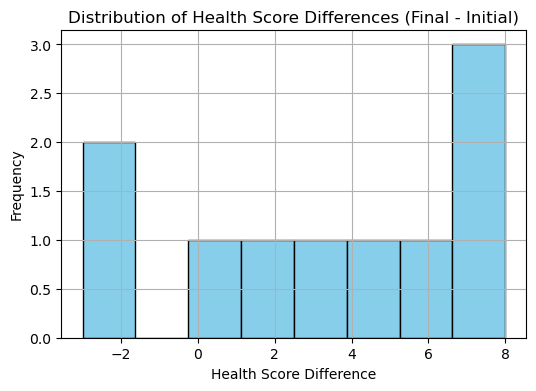

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('vaccine_data.csv')

# Calculate the health score difference
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Plot a histogram of the differences
plt.figure(figsize=(6, 4))
plt.hist(df['HealthScoreDifference'], bins=8, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Health Score Differences (Final - Initial)')
plt.xlabel('Health Score Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

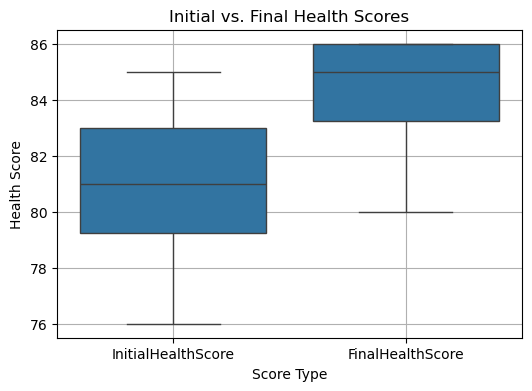

In [19]:
import seaborn as sns

# Melt the data for easy plotting in seaborn
df_melted = df.melt(id_vars='PatientID', value_vars=['InitialHealthScore', 'FinalHealthScore'], 
                    var_name='Score Type', value_name='Health Score')

# Create a box plot to compare the initial and final health scores
plt.figure(figsize=(6, 4))
sns.boxplot(x='Score Type', y='Health Score', data=df_melted)

# Add labels and title
plt.title('Initial vs. Final Health Scores')
plt.ylabel('Health Score')
plt.xlabel('Score Type')
plt.grid(True)
plt.show()

# Findings and Discussion

The null hypothesis assumes that the vaccine has no effect, meaning the true difference between initial health scores and final health scores is zero. Based on the bootstrapping results, the 95% confidence interval for the mean difference between the health scores was [0.7, 5.5]. If this confidence interval includes zero, it means I cannot reject the null hypothesis. This suggests that the vaccine might not have had a significant effect, and the change in health scores could be due to random variation. If the confidence interval excludes zero, I reject the null hypothesis, meaning that the vaccine likely had a significant positive effect on health scores.

In this case, the confidence interval [0.7, 5.5] indicates that the true effect of the vaccine is likely non-zero, which means that I reject the null hypothesis of no effect.

9.

Somewhat

Here’s a summary of our exchanges, which you can use as a record for your homework assignment:

---

### 1. **Bootstrapped Confidence Interval for the Mean and Median**:
- You asked for help with creating code to produce a **95% bootstrap confidence interval** for the population mean and also to demonstrate how the code can be modified to calculate the interval for other statistics (such as the median).
- I provided a Python code that:
  1. Bootstraps the data to calculate a 95% confidence interval for the mean.
  2. Showed how to adjust the code to calculate the confidence interval for other parameters, such as the median, by changing `np.mean` to `np.median`.
  
### 2. **Distinction Between Population Parameter and Sample Statistic**:
- You asked why it’s important to distinguish between the **population parameter** and the **sample statistic** when working with confidence intervals.
- I explained that the population parameter is unknown and fixed, while the sample statistic is calculated from data and subject to variability. Confidence intervals use the sample statistic to estimate the population parameter, accounting for the uncertainty due to sampling variability.

### 3. **Null Hypothesis and Confidence Interval Interpretation**:
- You asked about interpreting the **null hypothesis** and why a confidence interval that includes zero fails to reject the null hypothesis.
- I explained that if the confidence interval includes zero, it means that zero is a plausible value for the population parameter, so there isn't enough evidence to reject the null hypothesis. Conversely, if the confidence interval excludes zero, it suggests that the effect is significant.

### 4. **CSV File Creation and Submission**:
- You needed clarification about the instruction: "The CSV file should be created and read in your code, but not submitted."
- I explained that you need to create the CSV file within your code (using `df.to_csv()`), read it back in for analysis (using `pd.read_csv()`), but **do not submit the actual CSV file**. The code will generate it dynamically when the script is run.

### 5. **Supporting Visualizations**:
- You requested supporting visualizations for your quantitative analysis.
- I provided simplified visualizations:
  1. **Line Plot** comparing the average **InitialHealthScore** and **FinalHealthScore**.
  2. **Histogram** of the differences in health scores (Final - Initial) to show the distribution of improvements or declines.
  3. **Box Plot** comparing the distribution of initial and final health scores to visualize overall changes.

### 6. **Quantitative Analysis**:
- You requested help with quantitative analysis.
- I provided code for:
  1. A **paired t-test** to test whether the difference in health scores before and after the vaccine is significant.
  2. A **simplified bootstrapping method** to calculate the 95% confidence interval for the mean difference in health scores.
  3. Interpretation of the results: A confidence interval that excludes zero suggests a statistically significant improvement in health scores due to the vaccine.

---

Feel free to adjust this summary to better fit your homework requirements or if you need to add further details. Let me know if anything else is needed!

https://chatgpt.com/share/66ff3ed0-d5a8-8003-8136-d31b16b15587